In [4]:
#data analysis and manipulation
import numpy as np
import pandas as pd

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#statistics and machine learning
from statsmodels.tsa.api import adfuller
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GM
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
#importing the file that contains our features data
features=pd.read_csv('constituents-financials_csv-final.csv',index_col='Symbol')
features.head(10)

,Name,Price,Price/Earnings,Earnings/Share,Market Cap
Symbol,,,,,
MMM,3M Company,222.89,24.31,7.92,1.390000e+11
AOS,A.O. Smith Corp,60.24,27.76,1.70,1.078342e+10
ABT,Abbott Laboratories,56.27,22.51,0.26,1.020000e+11
ABBV,AbbVie Inc.,108.48,19.41,3.29,1.810000e+11
ACN,Accenture plc,150.51,25.47,5.44,9.876586e+10
ATVI,Activision Blizzard,65.83,31.80,1.28,5.251867e+10
AYI,Acuity Brands Inc,145.41,18.22,7.43,6.242378e+09
ADBE,Adobe Systems Inc,185.16,52.31,3.39,9.455021e+10
AAP,Advance Auto Parts,109.63,19.54,6.19,8.123612e+09


In [6]:
#dropping price column we only need P/E, E/P and Market Cap
features.drop('Price',1,inplace=True)
features

,Name,Price/Earnings,Earnings/Share,Market Cap
Symbol,,,,
MMM,3M Company,24.31,7.92,1.390000e+11
AOS,A.O. Smith Corp,27.76,1.70,1.078342e+10
ABT,Abbott Laboratories,22.51,0.26,1.020000e+11
ABBV,AbbVie Inc.,19.41,3.29,1.810000e+11
ACN,Accenture plc,25.47,5.44,9.876586e+10
ATVI,Activision Blizzard,31.80,1.28,5.251867e+10
AYI,Acuity Brands Inc,18.22,7.43,6.242378e+09
ADBE,Adobe Systems Inc,52.31,3.39,9.455021e+10
AAP,Advance Auto Parts,19.54,6.19,8.123612e+09


In [7]:
#Dropping Name columns
features.drop('Name',1,inplace=True)

In [22]:
features

,Price/Earnings,Earnings/Share,Market Cap,Cluster
Symbol,,,,
MMM,24.31,7.92,1.390000e+11,7
AOS,27.76,1.70,1.078342e+10,0
ABT,22.51,0.26,1.020000e+11,3
ABBV,19.41,3.29,1.810000e+11,4
ACN,25.47,5.44,9.876586e+10,3
ATVI,31.80,1.28,5.251867e+10,12
AYI,18.22,7.43,6.242378e+09,0
ADBE,52.31,3.39,9.455021e+10,3
AAP,19.54,6.19,8.123612e+09,0


In [9]:
features.head()

,Price/Earnings,Earnings/Share,Market Cap
Symbol,,,
MMM,24.31,7.92,1.390000e+11
AOS,27.76,1.70,1.078342e+10
ABT,22.51,0.26,1.020000e+11
ABBV,19.41,3.29,1.810000e+11
ACN,25.47,5.44,9.876586e+10


In [10]:
#initialzing K-Means algorithm
kmeans=KMeans(n_clusters=15,random_state=101)

In [11]:
#fitting kmeans to our features data
kmeans.fit(features.fillna(0))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=101, tol=0.0001, verbose=0)

In [12]:
#getting cluster labels
kmeans.labels_

array([ 7,  0,  3,  4,  3, 12,  0,  3,  0,  0,  0, 12,  0,  5,  9,  5,  0,
        0,  0,  0,  9,  9,  0, 12,  0,  0,  5,  2,  2,  7, 13,  0,  9,  5,
        8, 12, 12,  0,  9,  9,  9,  7,  9,  5,  5,  0,  0, 12,  5,  0,  0,
       11, 12,  9,  9,  0,  0,  0,  4,  9, 12,  9,  9,  0,  5,  0,  1,  5,
        5, 12, 14,  9,  8,  8,  0,  4,  0,  9,  5,  0,  3,  3,  0,  0,  0,
        0,  0,  0, 12,  9,  0, 12,  3,  0,  0,  9,  8,  9,  0,  9,  9,  0,
        8,  8,  0,  4,  0,  8,  0, 12,  0,  0,  9,  4,  4,  9,  0, 12,  0,
        4, 12, 12,  4,  0,  0,  9,  8,  9,  5,  9,  8,  0,  5,  0, 12,  9,
        8,  9,  8,  0,  0, 12,  5,  0,  9,  9,  9,  0,  0,  9,  9,  9, 12,
        0,  7,  9,  9, 12,  0,  9,  0,  0,  5,  5,  5,  9,  9,  5,  5,  0,
        0, 12,  0,  0,  5,  9,  0, 12,  0,  9,  5,  9,  0,  5,  0,  1,  0,
        6,  0,  0,  8,  5,  9,  0,  9,  0,  0,  0,  0,  0,  5,  9,  0,  9,
        9,  0,  0,  0,  8,  7,  9,  5, 12,  0,  3,  9,  3,  0,  0,  5,  0,
        0,  9,  9,  0,  5

In [13]:
features['Cluster']=kmeans.labels_

In [14]:
#reviewing features dataframe
features.head()

,Price/Earnings,Earnings/Share,Market Cap,Cluster
Symbol,,,,
MMM,24.31,7.92,1.390000e+11,7
AOS,27.76,1.70,1.078342e+10,0
ABT,22.51,0.26,1.020000e+11,3
ABBV,19.41,3.29,1.810000e+11,4
ACN,25.47,5.44,9.876586e+10,3


In [15]:
#calling tail method our dataframe
features.tail()

,Price/Earnings,Earnings/Share,Market Cap,Cluster
Symbol,,,,
XYL,30.94,1.83,1.291502e+10,0
YUM,27.25,4.07,2.700330e+10,9
ZBH,14.32,9.01,2.445470e+10,9
ZION,17.73,2.60,1.067068e+10,0
ZTS,32.80,1.65,3.599111e+10,5


In [16]:
#creating dataframe to hold data
clusters_df=pd.DataFrame()
#grouping our data by cluster for clusters with atleast 2 stocks in it.
clusters_df=pd.concat(i for clusters_df, i in features.groupby(features['Cluster']) if len(i) >1)

In [17]:
#checking the head of clusters df
clusters_df.head()

,Price/Earnings,Earnings/Share,Market Cap,Cluster
Symbol,,,,
AOS,27.76,1.70,1.078342e+10,0
AYI,18.22,7.43,6.242378e+09,0
AAP,19.54,6.19,8.123612e+09,0
AMD,187.00,0.03,1.119166e+10,0
AES,9.96,-1.72,6.920851e+09,0


In [18]:
#checking the tail of our cluster df
clusters_df.tail(10)

,Price/Earnings,Earnings/Share,Market Cap,Cluster
Symbol,,,,
SPGI,27.38,7.95,4.658595e+10,12
SPG,13.56,6.25,4.813984e+10,12
SYK,23.46,2.68,5.750910e+10,12
BK,14.76,3.73,5.608390e+10,12
TJX,21.01,3.46,4.818145e+10,12
AMZN,296.16,6.16,6.860000e+11,13
MSFT,25.76,2.97,6.900000e+11,13
BRK.B,30.43,9.76,2.610000e+11,14
V,32.72,2.80,2.700000e+11,14


After creating cluster now I am taking cluster 0 and trying to find any related pairs for that I will find out the cointegration among the pair
For that I am taking individual stock data of companies like AES Corportaion, Advanced auto parts, AO smith Corp,Advanced micro devices and Aetna
For making all uniform I am filtering data for the companies and taking data for year 2017 and taking into the account only 'Close' column
After I am merging data from different stock comapny into one and creating a single data frame and using linear regression I tried to find out conintegration among them.

In [19]:
#creating method to identify each possible pair
def create_pairs(symbolList):
 #creating a list to hold each possible pair
    pairs=[]
 #initializing placeholders for the symbols in each pair
    x=0
    y=0
    for count,symbol in enumerate(symbolList):
        for nextCount,nextSymbol in enumerate(symbolList):
            x=symbol
            y=nextSymbol
            if x !=y:
                pairs.append([x,y])

    return pairs

In [20]:
#creating list of symbols from cluster 0
symbol_list_0=['AES','AAP','AOS','AMD','AET']

In [21]:
#list of lists of pairs
all_pairs=create_pairs(symbol_list_0)

In [22]:
#printing list of all_pairs from cluster 0
all_pairs

[['AES', 'AAP'],
 ['AES', 'AOS'],
 ['AES', 'AMD'],
 ['AES', 'AET'],
 ['AAP', 'AES'],
 ['AAP', 'AOS'],
 ['AAP', 'AMD'],
 ['AAP', 'AET'],
 ['AOS', 'AES'],
 ['AOS', 'AAP'],
 ['AOS', 'AMD'],
 ['AOS', 'AET'],
 ['AMD', 'AES'],
 ['AMD', 'AAP'],
 ['AMD', 'AOS'],
 ['AMD', 'AET'],
 ['AET', 'AES'],
 ['AET', 'AAP'],
 ['AET', 'AOS'],
 ['AET', 'AMD']]

In [23]:
aap_data=pd.read_csv('aap.us.csv')
aap_data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2/25/2005,32.994,33.388,32.994,33.289,625774,0
1,2/28/2005,33.299,33.299,32.699,33.052,576995,0
2,3/1/2005,33.209,33.516,33.209,33.407,845445,0
3,3/2/2005,33.318,34.181,33.061,34.103,1320913,0
4,3/3/2005,34.103,34.428,33.975,34.044,896209,0


In [24]:
aap_data.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
3196,11/6/2017,81.53,81.81,80.31,80.71,1173581,0
3197,11/7/2017,80.66,80.66,78.90,79.38,1261581,0
3198,11/8/2017,79.20,80.62,78.81,79.41,3233316,0
3199,11/9/2017,79.56,81.09,79.14,80.45,1898508,0
3200,11/10/2017,80.16,81.99,80.00,81.22,1941881,0


In [25]:
aap_data['Date'] = pd.to_datetime(aap_data['Date'])  
mask = (aap_data['Date'] > '01/11/2017') & (aap_data['Date'] <= '12/11/2017')

In [26]:
aap_data_new=aap_data.loc[mask]
aap_data_new.index=aap_data_new['Date']

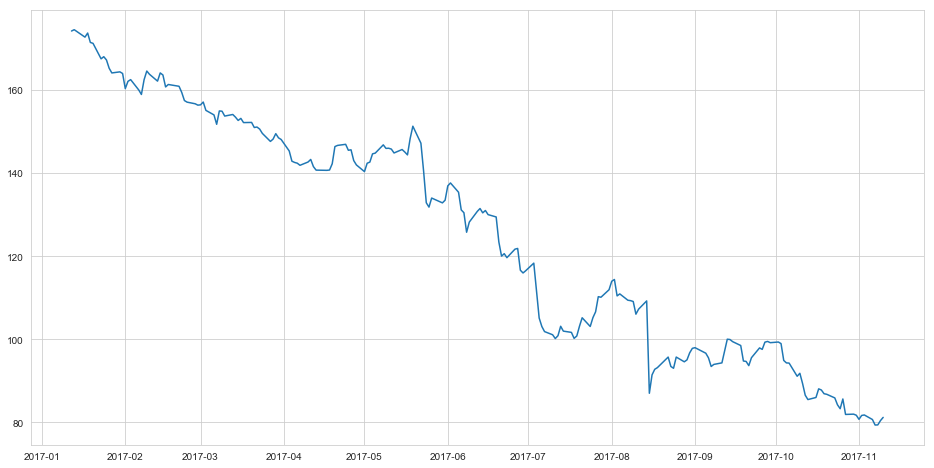

In [27]:
#plot
plt.figure(figsize=(16,8))
plt.plot(aap_data_new['Close'], label='Close Price history')

In [28]:
aes_data=pd.read_csv('aes.us.csv')
aes_data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,6/26/1991,2.7725,2.9884,2.7725,2.9195,18790675,0
1,6/27/1991,2.9884,3.0577,2.8936,2.9538,6950813,0
2,6/28/1991,2.9538,3.0231,2.8761,2.9280,2703634,0
3,7/1/1991,2.9884,2.9884,2.9195,2.9538,2037453,0
4,7/2/1991,2.9884,2.9884,2.9538,2.9884,1451154,0


In [29]:
aes_data['Date'] = pd.to_datetime(aes_data['Date'])  
mask = (aes_data['Date'] > '01/11/2017') & (aes_data['Date'] <= '12/11/2017')

In [30]:
aes_data_new=aes_data.loc[mask]
aes_data_new.index=aes_data_new['Date']

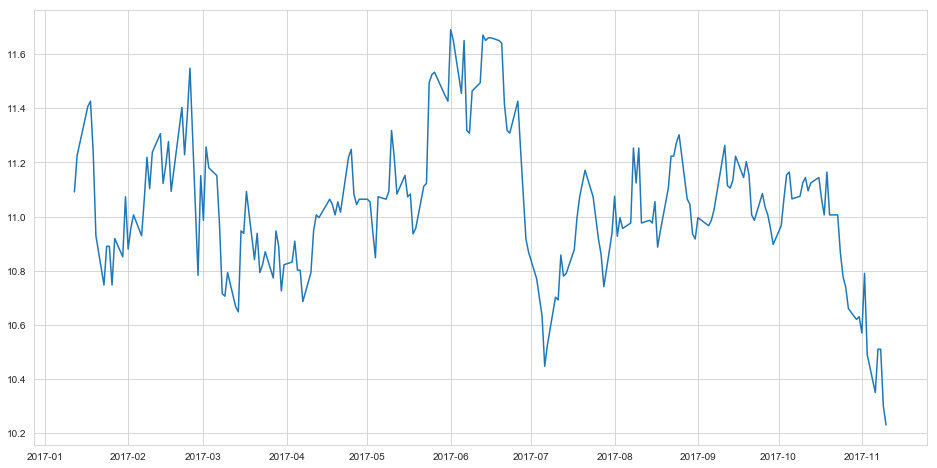

In [31]:
#plot
plt.figure(figsize=(16,8))
plt.plot(aes_data_new['Close'], label='Close Price history')

In [32]:
amd_data=pd.read_csv('amd.us.csv')
amd_data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,3/21/1983,8.97,9.03,8.81,9.00,528000,0
1,3/22/1983,8.72,8.97,8.50,8.50,332400,0
2,3/23/1983,8.50,8.81,8.47,8.72,442400,0
3,3/24/1983,8.72,8.78,8.66,8.78,412000,0
4,3/25/1983,8.91,9.06,8.75,8.88,216400,0


In [33]:
amd_data['Date'] = pd.to_datetime(amd_data['Date'])  
mask = (amd_data['Date'] > '01/11/2017') & (amd_data['Date'] <= '12/11/2017')
amd_data_new=amd_data.loc[mask]
amd_data_new.index=amd_data_new['Date']

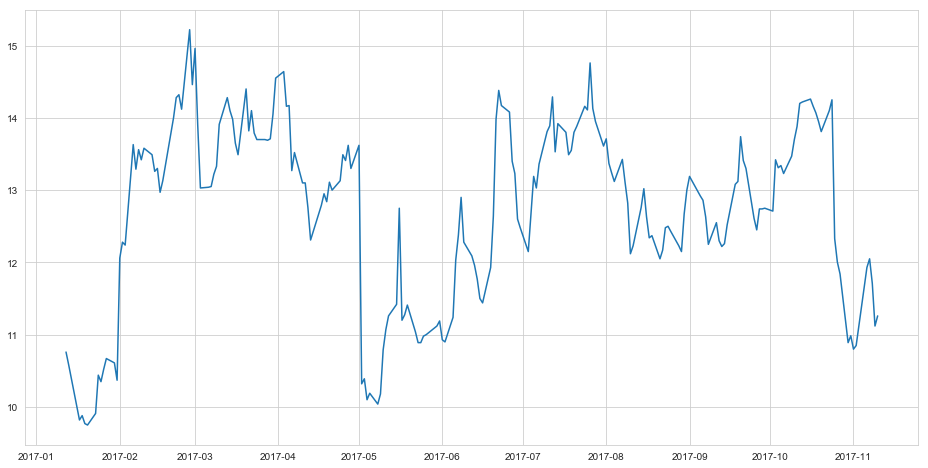

In [34]:
#plot
plt.figure(figsize=(16,8))
plt.plot(amd_data_new['Close'], label='Close Price history')

In [35]:
aos_data=pd.read_csv('aos.us.csv')
aos_data.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2/25/2005,4.0719,4.0995,4.0328,4.0903,555532,0
1,2/28/2005,4.0926,4.1248,4.0144,4.0305,1227114,0
2,3/1/2005,4.0374,4.1548,4.0328,4.1478,918709,0
3,3/2/2005,4.1409,4.1845,4.1181,4.1661,675500,0
4,3/3/2005,4.1661,4.2951,4.1548,4.2951,1360132,0


In [36]:
aos_data['Date'] = pd.to_datetime(aos_data['Date'])  
mask = (aos_data['Date'] > '01/11/2017') & (aos_data['Date'] <= '12/11/2017')
aos_data_new=aos_data.loc[mask]
aos_data_new.index=aos_data_new['Date']

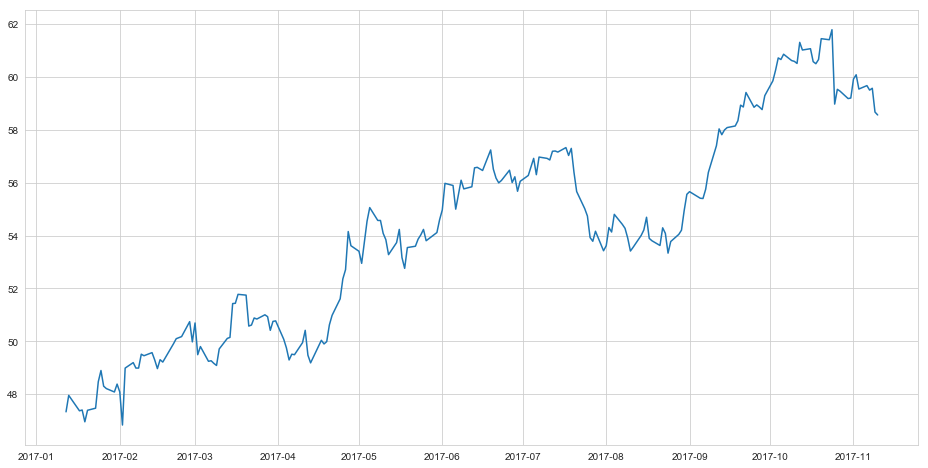

In [37]:
#plot
plt.figure(figsize=(16,8))
plt.plot(aos_data_new['Close'], label='Close Price history')

In [38]:
aet_data=pd.read_csv('aet.us.csv')

In [39]:
aet_data['Date'] = pd.to_datetime(aet_data['Date'])  
mask = (aet_data['Date'] > '01/11/2017') & (aet_data['Date'] <= '12/11/2017')
aet_data_new=aet_data.loc[mask]
aet_data_new.index=aet_data_new['Date']

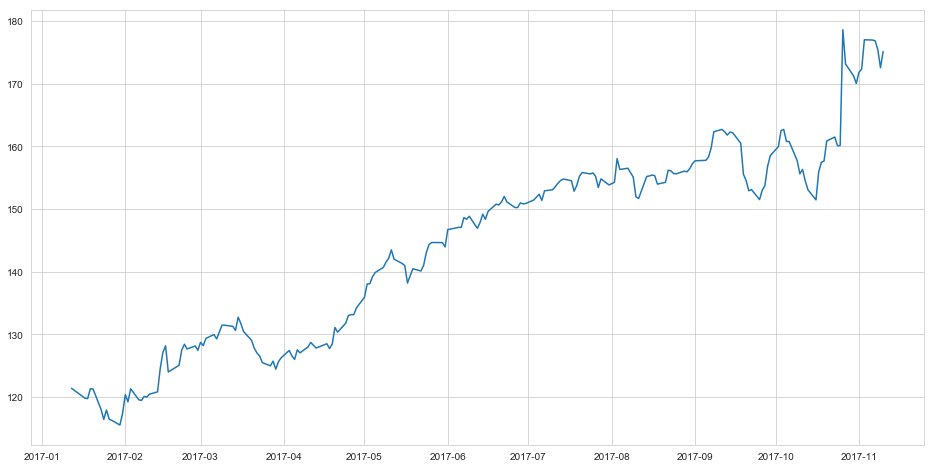

In [40]:
#plot
plt.figure(figsize=(16,8))
plt.plot(aet_data_new['Close'], label='Close Price history')

In [41]:
#creating list to hold original data
original_data={'AES':aes_data_new,'AAP':aap_data_new,'AOS':aos_data_new,'AMD':amd_data_new,'AET':aet_data_new}

In [42]:
#function to parse out training period data
def get_training_data(original_data,symbol_list,start,end):


#creating a dataframe to hold our parsed series
    training_df=pd.DataFrame()

#iterating over our symbol list
    for count, symbol in enumerate(symbol_list):

        try:

#making a copy of our original data for each symbol
            copy=original_data[symbol].copy()
           
#reindexing our copied data by Date column
            #copy=copy.reindex(index=copy['Date'],columns=copy.columns)
           
#restoring values of close column from our original data
            #copy[' Close']=original_data[symbol][' Close'].values
            #print(copy)
           # break
#parsing out our training period
            copy=copy.loc[start:end]['Close']
           
#adding training data to dataframe
            training_df[str(symbol)]=copy.values

        except:
            print(str(symbol),'Threw an Exception')
            print('Current Symbol Length:')
            print(len(copy.loc[start:end]))
            print("")
            print('training_df Length:')
            print(len(training_df))
            continue

    return training_df

In [45]:
#creating our training data dataframe using our training period start and end dates
training_df=get_training_data(original_data,symbol_list_1,'2017/01/01','2017/12/30')
training_df.head()

,AES,AAP,AOS,AMD,AET
0,11.091,174.21,47.332,10.76,121.38
1,11.225,174.53,47.955,10.58,121.05
2,11.407,172.74,47.371,9.82,119.80
3,11.426,173.72,47.401,9.88,119.73
4,11.235,171.46,46.955,9.77,121.30


In [46]:
#creating list of symbols from cluster 0
symbol_list_1=['AES','AAP','AOS','AMD','AET']

In [47]:
from scipy.stats import linregress

In [48]:
def get_cointegrated(all_pairs,training_df):


#creating a list to hold cointegrated pairs
    cointegrated=[]

#iterate over each pair in possible pairs list; pair is a list of our 2 stock symbols
    for count, pair in enumerate(all_pairs):
        try:

#getting data for each stock in pair from training_df
            ols=linregress(training_df[str(pair[1])],training_df[str(pair[0])]) #note scipy's linregress takes in Y then X

#storing slope or hedge ratio in variable
            slope=ols[0]

#creating spread
            spread=training_df[str(pair[1])]-(slope*training_df[str(pair[0])])

#testing spread for cointegration
            cadf=adfuller(spread,1)

#checking to see if spread is cointegrated, if so then store pair in cointegrated list
            if cadf[0] < cadf[4]['1%']:
                print('Pair Cointegrated at 99% Confidence Interval')
#appending the X and Y of pair
                cointegrated.append([pair[0],pair[1]])
            elif cadf[0] < cadf[4]['5%']:
                print('Pair Cointegrated at 95% Confidence Interval')
#appending the X and Y of pair
                cointegrated.append([pair[0],pair[1]])
            elif cadf[0] < cadf[4]['10%']:
                print('Pair Cointegrated at 90% Confidence Interval')
                cointegrated.append(pair[0],pair[1])
            else:
                print('Pair Not Cointegrated ')
                continue
        except:
            print('Exception: Symbol not in Dataframe')
            continue

    return cointegrated

In [49]:
#getting our cointegrated pairs
cointegrated_from_cluster_0=get_cointegrated(all_pairs,training_df)

Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Cointegrated at 95% Confidence Interval
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Cointegrated at 90% Confidence Interval
Exception: Symbol not in Dataframe
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 
Pair Not Cointegrated 


In [50]:
cointegrated_from_cluster_0

[['AES', 'AMD']]

AS we can see above we got two companies with conintegration, this is the step towards building a portfolio
Now to take it further I would like to demonstrate behaviorial finance, for that I would like to implement stock prediction using sentiments 
For that I am using stock "Apple" it is in cluster 11 and also I got the market sentiments data for it and for prediction I am using LSTM recurrent neural network




In [54]:
features.loc[['AAPL']]

,Price/Earnings,Earnings/Share,Market Cap,Cluster
Symbol,,,,
AAPL,16.86,9.2,8.100000e+11,11
